<a href="https://colab.research.google.com/github/Sun-ny-A/food-sales-predictions/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cleaning data**

In [41]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')

In [43]:
#upload data
df = pd.read_csv('/content/cause of death under 5.csv')

#only uploading columns that I will use for project: 
#ParentLocation (continent), Location (country), Period (year), Dim1 (age), and Dim2 (cause of death).
df = pd.DataFrame(df, columns={'ParentLocation': 'Location', 'Location': 'Country', 'Period': 'Year', 'Dim1': 'Age', 'Dim2': 'Death'})
df.head(10)

,ParentLocation,Location,Period,Dim1,Dim2
0,Africa,Angola,2017,0-27 days,HIV/AIDS
1,Africa,Angola,2017,0-27 days,Diarrhoeal diseases
2,Africa,Angola,2017,0-27 days,Tetanus
3,Africa,Angola,2017,0-27 days,Measles
4,Africa,Angola,2017,0-27 days,Meningitis/encephalitis
5,Africa,Angola,2017,0-27 days,Malaria
6,Africa,Angola,2017,0-27 days,Acute lower respiratory infections
7,Africa,Angola,2017,0-27 days,Prematurity
8,Africa,Angola,2017,0-27 days,Birth asphyxia and birth trauma
9,Africa,Angola,2017,0-27 days,Sepsis and other infectious conditions of the ...


In [44]:
#change column names
df.columns = ['Location', 'Country', 'Year', 'Age', 'Death']
df.head()

,Location,Country,Year,Age,Death
0,Africa,Angola,2017,0-27 days,HIV/AIDS
1,Africa,Angola,2017,0-27 days,Diarrhoeal diseases
2,Africa,Angola,2017,0-27 days,Tetanus
3,Africa,Angola,2017,0-27 days,Measles
4,Africa,Angola,2017,0-27 days,Meningitis/encephalitis


In [45]:
#check for duplicates
df.duplicated().sum()
#no duplicate data

0

In [46]:
#no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  30000 non-null  object
 1   Country   30000 non-null  object
 2   Year      30000 non-null  int64 
 3   Age       30000 non-null  object
 4   Death     30000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [47]:
#check how may subsets of each column
df['Location'].value_counts()

Africa    30000
Name: Location, dtype: int64

In [48]:
#it looks like the data only is only for one continent. So I can delete the location column because all these countries are in Africa.
#remove Location column
df.drop(['Location'], axis=1)

,Country,Year,Age,Death
0,Angola,2017,0-27 days,HIV/AIDS
1,Angola,2017,0-27 days,Diarrhoeal diseases
2,Angola,2017,0-27 days,Tetanus
3,Angola,2017,0-27 days,Measles
4,Angola,2017,0-27 days,Meningitis/encephalitis
...,...,...,...,...
29995,Seychelles,2005,0-27 days,Prematurity
29996,Seychelles,2005,0-27 days,Birth asphyxia and birth trauma
29997,Seychelles,2005,0-27 days,Sepsis and other infectious conditions of the ...
29998,Seychelles,2005,0-27 days,"Other communicable, perinatal and nutritional ..."


In [49]:
#check subsets for Country column, no repeats
df['Country'].value_counts()

Angola                              756
Burundi                             756
Liberia                             756
Lesotho                             756
Madagascar                          756
Mali                                756
Mozambique                          756
Mauritania                          756
Mauritius                           756
Malawi                              756
Namibia                             756
Niger                               756
Nigeria                             756
Rwanda                              756
Senegal                             756
Sierra Leone                        756
South Sudan                         756
Sao Tome and Principe               756
Eswatini                            756
Kenya                               756
Equatorial Guinea                   756
Guinea-Bissau                       756
Congo                               756
Benin                               756
Burkina Faso                        756


In [50]:
#check subsets for Year column, no numerical errors
df['Year'].value_counts()

2017    1680
2010    1680
2006    1680
2007    1680
2016    1680
2009    1680
2008    1680
2011    1680
2012    1680
2013    1680
2014    1680
2015    1680
2005    1650
2004    1638
2003    1638
2002    1638
2001    1638
2000    1638
Name: Year, dtype: int64

In [51]:
#check subsets for Death column
df['Death'].value_counts()

HIV/AIDS                                                    2143
Diarrhoeal diseases                                         2143
Tetanus                                                     2143
Measles                                                     2143
Meningitis/encephalitis                                     2143
Malaria                                                     2143
Acute lower respiratory infections                          2143
Prematurity                                                 2143
Birth asphyxia and birth trauma                             2143
Sepsis and other infectious conditions of the newborn       2143
Other communicable, perinatal and nutritional conditions    2143
Congenital anomalies                                        2143
Other noncommunicable diseases                              2142
Injuries                                                    2142
Name: Death, dtype: int64

In [52]:
#check subsets for Age column
df['Age'].value_counts()

0-27 days      10008
1-59 months     9996
0-4 years       9996
Name: Age, dtype: int64

In [53]:
#I need a better method to list the age category as a dash, -, won't be considered numeric
# they all need to be in one type of unit. By months? 27 days is close to 1 month.
df['Age'] = df['Age'].replace(['0-27 days'],'1')
df['Age'] = df['Age'].replace(['1-59 months'],'59')
df['Age'] = df['Age'].replace(['0-4 years'],'48')
df['Age'].value_counts()

1     10008
59     9996
48     9996
Name: Age, dtype: int64

In [121]:
#change Age dtype from object to numeric for easier graphing
df['Age']= df['Age'].astype(float)

no ordinal columns

**Visualizations**

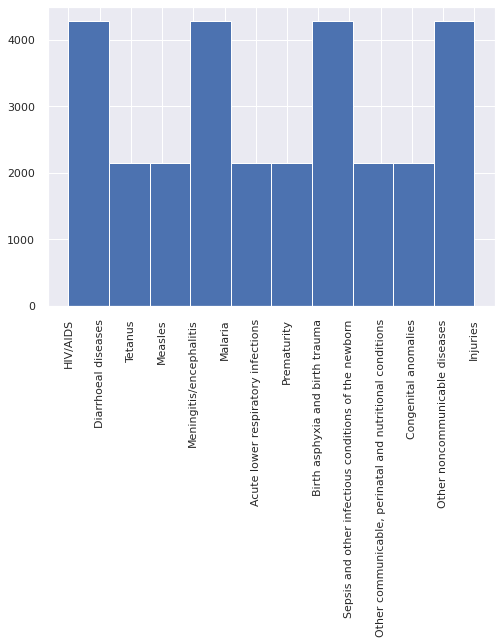

In [130]:
df['Death'].hist()
plt.xticks(rotation=90);

#histogram of death rates by cause

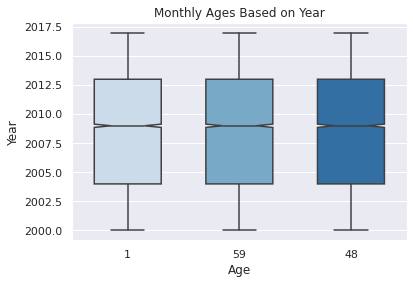

In [74]:
sns.boxplot(x = df['Age'], y = df['Year'], width=0.6, palette="Blues", notch=True).set(title='Monthly Ages Based on Year')
sns.set(style="darkgrid")

The above boxplot shows that there was a very close to even distribution of ages that were collected from year 2000 till 2017.